# Imports

In [80]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

Read data

In [60]:
df = pd.read_csv('daily_prices/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-12,55.105000,55.720001,54.209999,55.527500,53.180561,161351600
1,2018-10-15,55.290001,55.457500,54.317501,54.340000,52.043247,123164000
2,2018-10-16,54.732498,55.747501,54.189999,55.537498,53.190140,116736000
3,2018-10-17,55.575001,55.660000,54.834999,55.297501,52.960281,91541600
4,2018-10-18,54.465000,54.935001,53.250000,54.005001,51.722412,130325200
...,...,...,...,...,...,...,...
1252,2023-10-05,173.789993,175.449997,172.679993,174.910004,174.910004,48527900
1253,2023-10-06,173.800003,177.990005,173.179993,177.490005,177.490005,57224100
1254,2023-10-09,176.809998,179.050003,175.800003,178.990005,178.990005,42390800
1255,2023-10-10,178.100006,179.720001,177.949997,178.389999,178.389999,43698000


In [61]:
# Extract the time and value columns
time_series = np.array(range(len(df['Date'])))  # Replace with your time column name
values = df['Close']                            # Replace with your value column name

# Scipy Detrend with LinearRegression

In [62]:
# Calculate the trendline using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(values)), values)
trendline = intercept + slope * range(len(values))

# Detrend the data by subtracting the trendline
detrended_data = values - trendline

# Create a new DataFrame with detrended data
detrended_df = pd.DataFrame({'Time': time_series, 'Detrended': detrended_data})

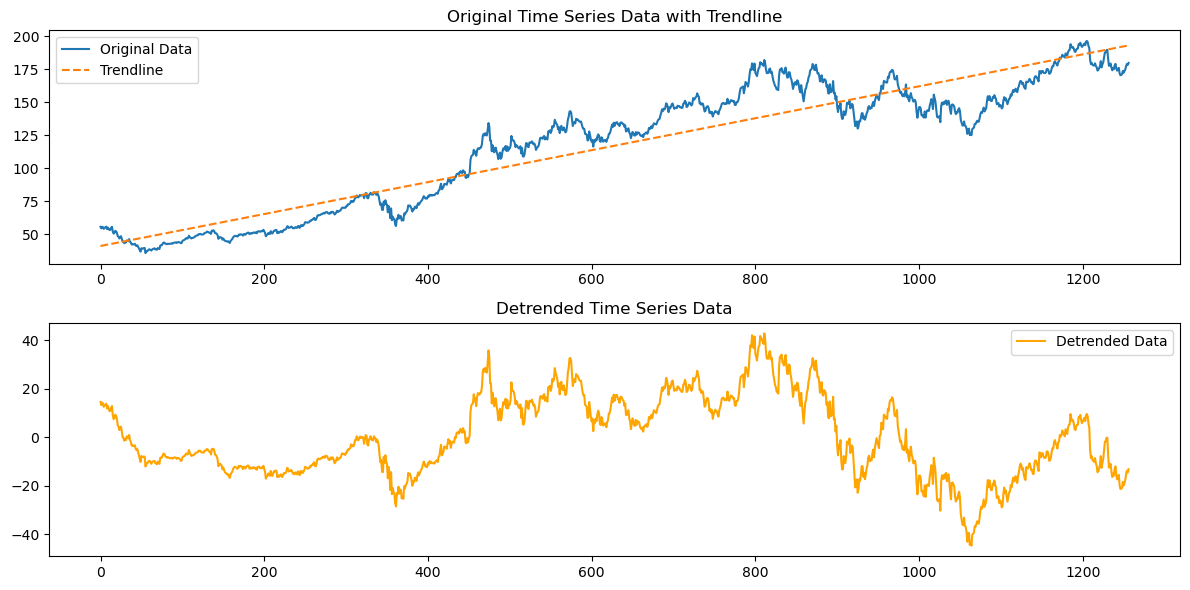

In [63]:
# Plot the original and detrended data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_series, values, label='Original Data')
plt.plot(time_series, trendline, label='Trendline', linestyle='--')
plt.legend()
plt.title('Original Time Series Data with Trendline')

plt.subplot(2, 1, 2)
plt.plot(time_series, detrended_data, label='Detrended Data', color='orange')
plt.legend()
plt.title('Detrended Time Series Data')
plt.tight_layout()
plt.show()

# Stats Models Seasonal Decompose

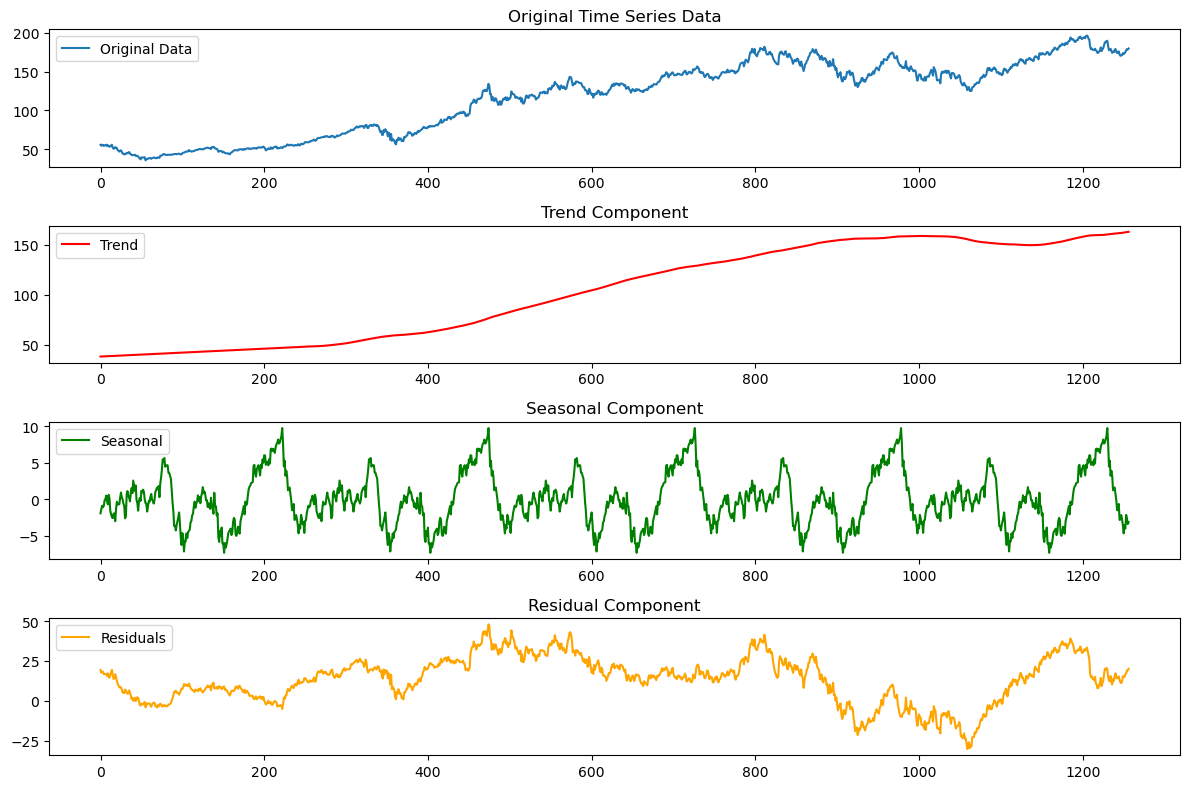

In [89]:
# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(values, model='additive', period=252, extrapolate_trend=25, two_sided=False)

# Plot the original data, trend, seasonal, and residuals
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time_series, values, label='Original Data')
plt.legend()
plt.title('Original Time Series Data')

plt.subplot(4, 1, 2)
plt.plot(time_series, result.trend, label='Trend', color='red')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(time_series, result.seasonal, label='Seasonal', color='green')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(time_series, result.resid, label='Residuals', color='orange')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.show()

# Scikit Learn Linear Regression

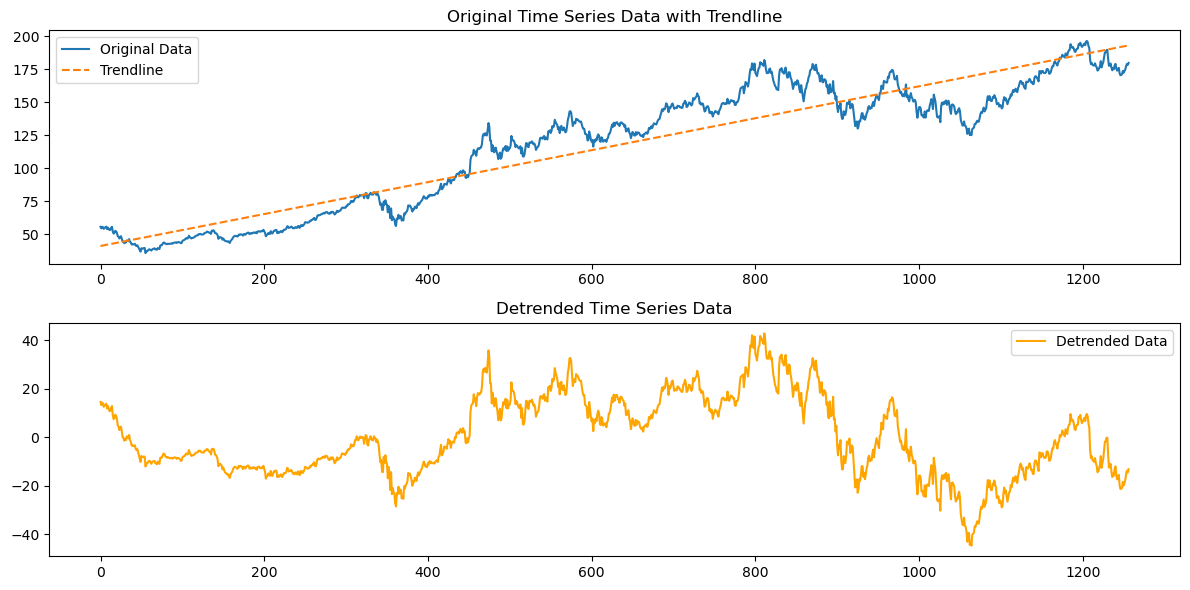

In [69]:
model = LinearRegression()
model.fit(time_series.reshape(-1, 1), values)

trendline = model.intercept_ + model.coef_ * range(len(values))

# Detrend the data by subtracting the trendline
detrended_data = values - trendline

# Create a new DataFrame with detrended data
detrended_df = pd.DataFrame({'Time': time_series, 'Detrended': detrended_data})

# Plot the original and detrended data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_series, values, label='Original Data')
plt.plot(time_series, trendline, label='Trendline', linestyle='--')
plt.legend()
plt.title('Original Time Series Data with Trendline')

plt.subplot(2, 1, 2)
plt.plot(time_series, detrended_data, label='Detrended Data', color='orange')
plt.legend()
plt.title('Detrended Time Series Data')
plt.tight_layout()
plt.show()

# Scipy Fit Seasonal Component

[0.00735821 2.00045911]


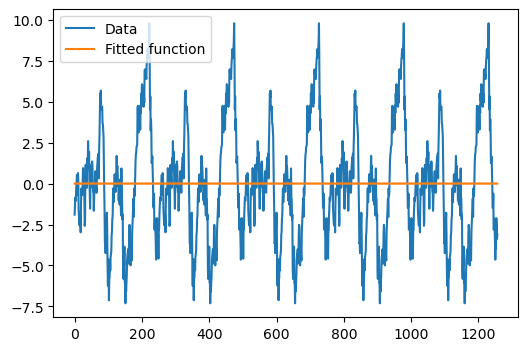

In [92]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, time_series, result.seasonal, p0=[2, 2])

plt.figure(figsize=(6, 4))
plt.plot(time_series, result.seasonal, label='Data')
plt.plot(time_series, test_func(time_series, params[0], params[1]), label='Fitted function')
plt.legend(loc='best')
plt.show()

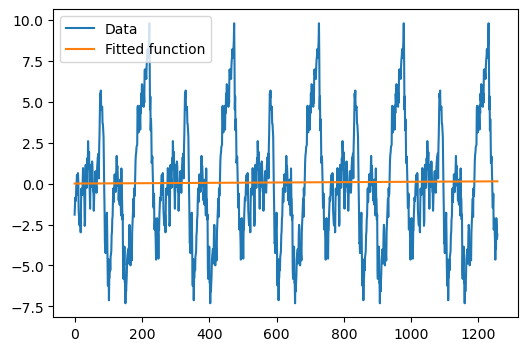

In [101]:
from scipy import optimize

def test_func(x, k, f):
    return 1/k * np.sin(2 * np.pi * k *  f * x)

params, params_covariance = optimize.curve_fit(test_func, time_series, result.seasonal, p0=[2, 2])

plt.figure(figsize=(6, 4))
plt.plot(time_series, result.seasonal, label='Data')
plt.plot(time_series, test_func(time_series, params[0], params[1]), label='Fitted function')
plt.legend(loc='best')
plt.show()

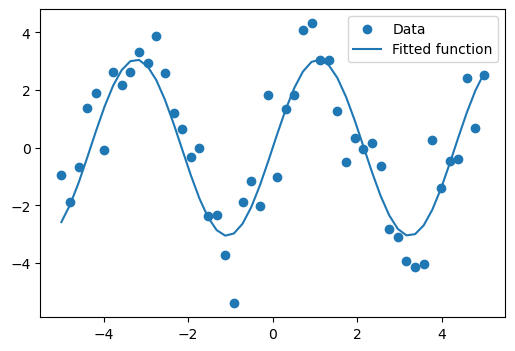

In [94]:
import numpy as np
from scipy import optimize

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]), label='Fitted function')
plt.legend(loc='best')
plt.show()

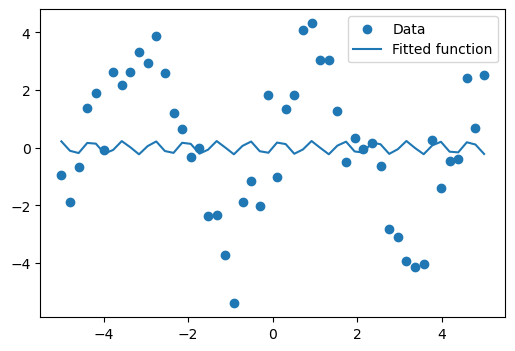

In [103]:
import numpy as np
from scipy import optimize

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

def test_func(x, k, f):
    return 1/k * np.sin(2 * np.pi * k *  f * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]), label='Fitted function')
plt.legend(loc='best')
plt.show()

# Plotting Seasonal Compnents (Extrapolating)

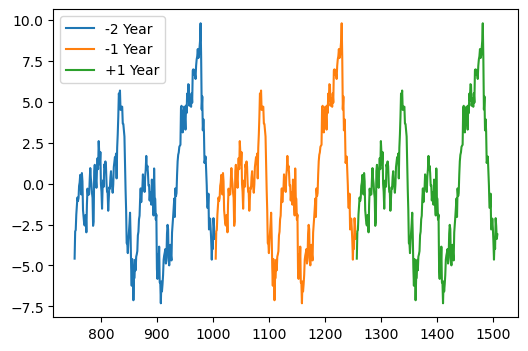

In [116]:
plt.figure(figsize=(6, 4))
plt.plot(time_series[-(252*2):-252], result.seasonal[-(252*2):-252], label='-2 Year')
plt.plot(time_series[-252:], result.seasonal[-252:], label='-1 Year')
plt.plot(np.array(range(time_series[-1]+1, time_series[-1]+1+252)), result.seasonal[-(252*2):-252], label='+1 Year')
plt.legend(loc='best')
plt.show()

# Plotting Trend Component (Extrapolating)

Text(0.5, 1.0, 'Original Time Series Data with Trendline')

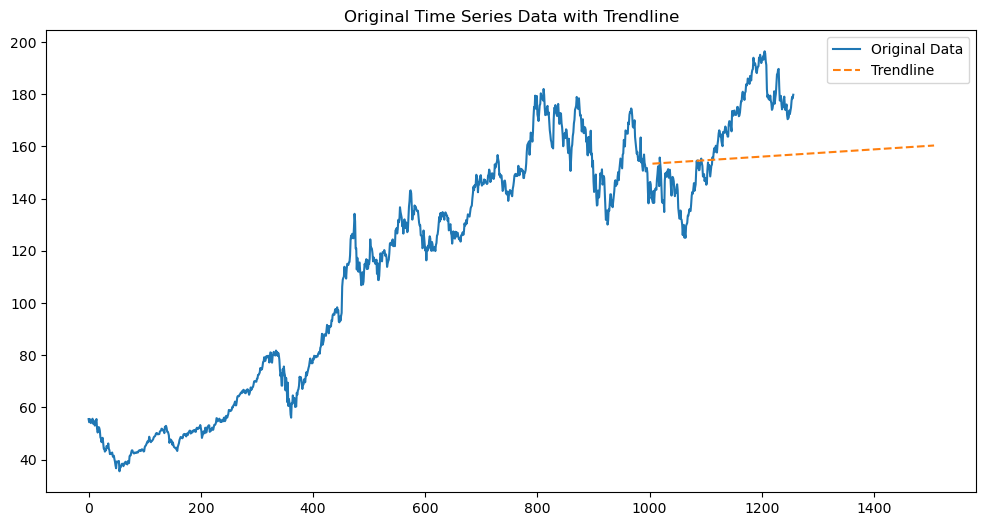

In [131]:
model = LinearRegression()
model.fit(time_series[-252:].reshape(-1, 1), result.trend[-252:])

trendline = model.intercept_ + model.coef_ * range(time_series[-252], time_series[-1]+252)

# Plot the original and detrended data
plt.figure(figsize=(12, 6))
plt.plot(time_series, values, label='Original Data')
plt.plot(np.array(range(time_series[-252], time_series[-1]+252)), trendline, label='Trendline', linestyle='--')
plt.legend()
plt.title('Original Time Series Data with Trendline for Past Year')

In [127]:
range(time_series[-252:], time_series[-1]+252)

TypeError: only integer scalar arrays can be converted to a scalar index